In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
import numpy as np
from tqdm import tqdm
import pickle
from node2vec import Node2Vec
import pandas as pd

import sys

sys.path.append("../")

from src.futbol_types import TransitionMatrix
from src.utils_CTMC import build_Q, psl_estimator

/Users/nacho/Desktop/code/understat-xg/.conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
R_storage = np.load("R_storage.npy")
R_storage.shape

(380, 2, 4, 15, 15)

In [8]:
from src.event_processing import leer_excel

epl = leer_excel("../SampleData/epl.xlsx")

In [9]:
from src.event_processing import (
    separar_partido_del_equipo_en_lineups,
    separar_partido_en_equipo_pov,
    separar_partidos,
)
from src.match_data_extraction import get_lineup_duration


partidos = separar_partidos(epl)

In [10]:
# Store the Duration of each lineup in the R_storage 0, 0

for pi, partido in enumerate(partidos):
    for ti, equipo in enumerate(separar_partido_en_equipo_pov(partido)):
        for li, lineup in enumerate(separar_partido_del_equipo_en_lineups(equipo)):
            R_storage[pi, ti, li, 0, 0] = get_lineup_duration(lineup)

In [11]:
from src.epl_player_data_utils import EPLPlayerData

epl_player_data = EPLPlayerData("../SampleData/players.json")
epl_player_data

EPLPlayerData(../SampleData/players.json): 804 players

In [12]:
# Given a R_storage[0, 0, 0] 15x15 matrix
# The R_storage[0, 0, 0, 0, 1:] is the IDs
# The R_storage[0, 0, 0, 1:, 0] is the IDs

# The R_storage[0, 0, 0, 1:, 1:] is the transition matrix

def R_to_DataFrame(R: TransitionMatrix):

    # Col, Index 0 name is "G"
    # Col, Index 12 name is "L"
    # Col, Index 13 name is "S"

    names = ["G"] + list(R[0, 2:-2]) + ["L", "S"]
    print(names)
    df = pd.DataFrame(R[1:, 1:], index=names, columns=names)
    
    return df

R_to_DataFrame(R_storage[0, 0, 0])

['G', 17733.0, 19524.0, 15943.0, 20467.0, 80254.0, 8758.0, 42427.0, 17127.0, 43274.0, 28566.0, 59936.0, 'L', 'S']


,G,17733.0,19524.0,15943.0,20467.0,80254.0,8758.0,42427.0,17127.0,43274.0,28566.0,59936.0,L,S
G,0.0,0.193496,0.354743,0.274120,0.225746,0.435367,0.322494,0.370868,0.177372,0.322494,0.467616,0.080623,0.000000,0.000000
17733.0,0.0,0.000000,0.080623,0.016125,0.016125,0.016125,0.032249,0.032249,0.000000,0.032249,0.048374,0.000000,0.306369,0.016125
19524.0,0.0,0.048374,0.000000,0.048374,0.128998,0.096748,0.128998,0.128998,0.016125,0.128998,0.128998,0.000000,0.467616,0.032249
15943.0,0.0,0.032249,0.048374,0.000000,0.080623,0.016125,0.193496,0.161247,0.386993,0.048374,0.112873,0.016125,0.225746,0.016125
20467.0,0.0,0.016125,0.032249,0.000000,0.000000,0.112873,0.048374,0.048374,0.016125,0.000000,0.000000,0.000000,0.274120,0.016125
80254.0,0.0,0.016125,0.096748,0.096748,0.080623,0.016125,0.128998,0.048374,0.112873,0.080623,0.128998,0.016125,0.370868,0.016125
8758.0,0.0,0.048374,0.322494,0.161247,0.048374,0.112873,0.000000,0.096748,0.209621,0.048374,0.209621,0.000000,0.209621,0.000000
42427.0,0.0,0.048374,0.096748,0.209621,0.032249,0.016125,0.177372,0.000000,0.048374,0.112873,0.128998,0.000000,0.370868,0.000000
17127.0,0.0,0.032249,0.000000,0.370868,0.032249,0.290245,0.112873,0.016125,0.000000,0.016125,0.080623,0.016125,0.080623,0.000000
43274.0,0.0,0.048374,0.048374,0.016125,0.000000,0.048374,0.032249,0.112873,0.000000,0.000000,0.000000,0.000000,0.354743,0.032249


In [13]:
import matplotlib.pyplot as plt
import networkx as nx

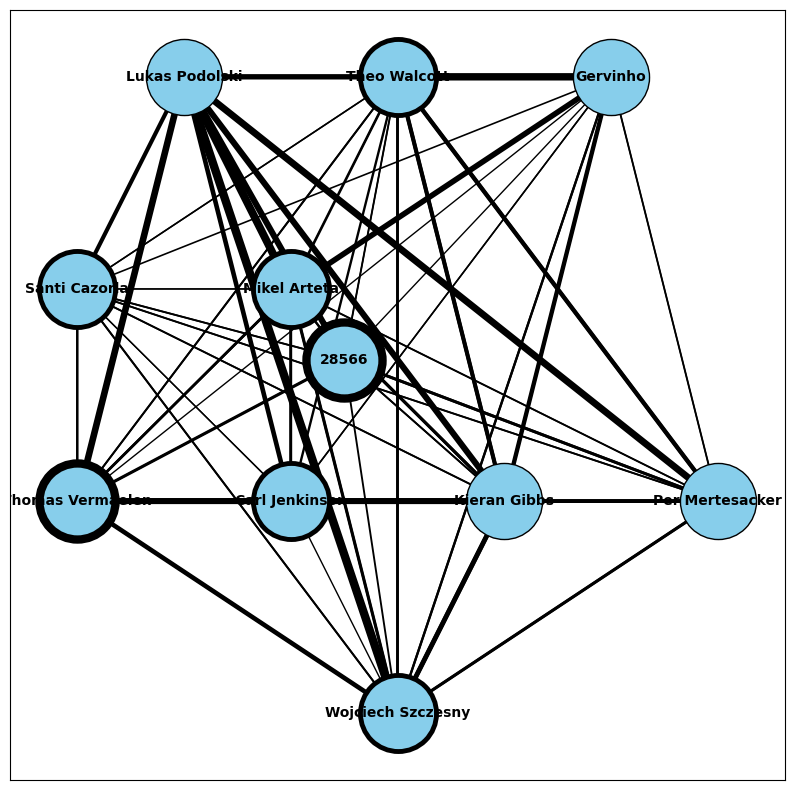

In [14]:
# Custom layout function for football positions
def football_layout(G):
    pos = {}
    y_positions = {"G": 0.1, "D": 0.3, "M": 0.5, "F": 0.7}
    x_positions = {
        "G": [0.5],
        "D": [0.2, 0.4, 0.6, 0.8],
        "M": [0.2, 0.4, 0.6, 0.8],
        "F": [0.3, 0.5, 0.7],
    }

    for node in G.nodes(data=True):
        position = node[1].get("position")
        if position in x_positions:
            x = x_positions[position].pop(0)
            y = y_positions[position]
            pos[node[0]] = (x, y)
        else:
            # Infer the position based on the other nodes
            neighbors = list(G.neighbors(node[0]))
            if len(neighbors) == 0:
                pos[node[0]] = (0.5, 0.5)
            else:
                x = sum([pos[n][0] for n in set(neighbors).intersection(pos.keys())]) / len(neighbors)
                y = sum([pos[n][1] for n in set(neighbors).intersection(pos.keys())]) / len(neighbors)
                pos[node[0]] = (x, y)

    return pos


def R_to_Graph(R: TransitionMatrix, names: list[str]):
    """
    Convert a Transition Matrix to a Directed Graph
    """

    G = nx.DiGraph()

    for i, name in enumerate(names):
        player_name = epl_player_data.get_player_name(name)
        player_name = player_name if player_name else name

        # Shot Ratio is Q[1+i, 14]
        shot_ratio = R[1 + i, 14]
        G.add_node(player_name, 
                    position=epl_player_data.get_player_position(name),
                    shot_ratio=shot_ratio
        )

    for i, name in enumerate(names):
        player_name = epl_player_data.get_player_name(name)
        player_name = player_name if player_name else name

        for j, name2 in enumerate(names):
            player_name2 = epl_player_data.get_player_name(name2)
            player_name2 = player_name2 if player_name2 else name2
            if i == j:
                continue
            if R[1 + i, 1 + j] > 0:
                G.add_edge(player_name, player_name2, weight=R[1 + i, 1 + j])

    return G


R = R_storage[0, 0, 0]

G = R_to_Graph(R, [int(x) for x in list(R[1:, 0][1:-2])])

# Use custom football layout for positioning
pos = football_layout(G)

fig, ax = plt.subplots(figsize=(10, 10))

# Extract shot ratios and normalize them for outline thickness
shot_ratios = [G.nodes[node]["shot_ratio"] for node in G.nodes()]
max_shot_ratio = max(shot_ratios)
min_shot_ratio = min(shot_ratios)
norm_shot_ratios = [
    (shot_ratio - min_shot_ratio) / (max_shot_ratio - min_shot_ratio) * 5 + 1
    for shot_ratio in shot_ratios
]

# Draw nodes with varying outline thickness
for node, outline_thickness in zip(G.nodes(), norm_shot_ratios):
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=[node],
        node_size=3000,
        node_color="skyblue",
        edgecolors="black",
        linewidths=outline_thickness,
        ax=ax,
    )

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold", ax=ax)

# Extract edge weights and normalize them for thickness
weights = [G[u][v]["weight"] for u, v in G.edges()]
max_weight = max(weights)
min_weight = min(weights)
norm_weights = [
    (weight - min_weight) / (max_weight - min_weight) * 5 + 1 for weight in weights
]

# Draw edges with varying thickness
nx.draw_networkx_edges(G, pos, width=norm_weights, ax=ax)

plt.show()

In [15]:
def R_to_full_graph(R: TransitionMatrix, names: list[str], ti="", pi="", li=""):
    """
    Convert a Transition Matrix to a Directed Graph
    """

    G = nx.DiGraph()

    suffix = f"_{ti}_{pi}_{li}" if ti != "" and pi != "" and li != "" else ""

    gain_state = "Gain" + suffix
    loss_state = "Loss" + suffix
    shot_state = "Shot" + suffix

    G.add_node(gain_state, position="Gain")
    G.add_node(loss_state, position="Loss")
    G.add_node(shot_state, position="Shot")

    for i, name in enumerate(names):
        player_i_state = f"{name}_{ti}_{pi}_{li}"

        # Shot Ratio is Q[1+i, 14]
        shot_ratio = R[2 + i, 14]
        G.add_node(player_i_state, 
                    position=epl_player_data.get_player_position(name),
                    shot_ratio=shot_ratio
        )

        # Add edge to the Gain state, the weight is the probability of the player gaining possession
        # W = R[1 + i, 0]
        # Check if its finite
        if np.isfinite(R[2 + i, 1]) and R[2 + i, 1] > 0:
            G.add_edge(gain_state, player_i_state, weight=R[2 + i, 1])

        # Add edge to the Loss state, the weight is the probability of the player losing possession
        # W = R[2 + i, 13]
        if np.isfinite(R[2 + i, 13]) and R[2 + i, 13] > 0:
            G.add_edge(player_i_state, loss_state, weight=R[2 + i, 13])

        # Add edge to the Shot state, the weight is the probability of the player taking a shot
        # W = R[2 + i, 14]
        if np.isfinite(R[2 + i, 14]) and R[2 + i, 14] > 0:
            G.add_edge(player_i_state, shot_state, weight=R[2 + i, 14])

    for i, name in enumerate(names):
        player_i_state = f"{name}_{ti}_{pi}_{li}"
        # player_name = epl_player_data.get_player_name(name)
        # player_name = player_name if player_name else name

        for j, name2 in enumerate(names):
            # player_name2 = epl_player_data.get_player_name(name2)
            # player_name2 = player_name2 if player_name2 else name2
            if i == j:
                continue
            player_j_state = f"{name2}_{ti}_{pi}_{li}"

            if R[2 + i, 2 + j] > 0:
                G.add_edge(player_i_state, 
                           player_j_state,
                           weight=R[2 + i, 2 + j]
                        )

    return G

In [16]:
all_ids = set()

for pi, partido in tqdm(enumerate(partidos), total=len(partidos)):
    for ti, equipo in enumerate(separar_partido_en_equipo_pov(partido)):
        for li, lineup in enumerate(separar_partido_del_equipo_en_lineups(equipo)):
            R = R_storage[pi, ti, li]
            ids = [int(x) for x in list(R[1:, 0][1:-2])]
            all_ids.update(ids)

all_ids

100%|██████████| 380/380 [00:01<00:00, 298.28it/s]


{0,
 3,
 160,
 363,
 1131,
 1195,
 1212,
 1216,
 1243,
 1256,
 1344,
 1411,
 1420,
 1632,
 1640,
 1679,
 1718,
 1795,
 1803,
 1809,
 1814,
 1821,
 1822,
 1827,
 1840,
 1869,
 1881,
 1936,
 1950,
 2034,
 2051,
 2060,
 2404,
 2570,
 3118,
 3201,
 3289,
 3296,
 3332,
 3658,
 3673,
 3736,
 3773,
 3785,
 4098,
 4255,
 4396,
 4445,
 4570,
 4611,
 4990,
 5288,
 5306,
 5589,
 5609,
 5716,
 5741,
 5750,
 6219,
 6240,
 6254,
 6286,
 6994,
 7525,
 7551,
 7631,
 7645,
 7933,
 7958,
 8378,
 8380,
 8402,
 8432,
 8595,
 8597,
 8742,
 8758,
 9007,
 9047,
 9089,
 9110,
 9493,
 9631,
 10356,
 10451,
 10466,
 10709,
 10738,
 10949,
 10954,
 11037,
 11212,
 11278,
 11334,
 11378,
 11467,
 11735,
 11829,
 11883,
 11911,
 11951,
 11987,
 12002,
 12086,
 12092,
 12150,
 12297,
 12413,
 12450,
 12679,
 12745,
 12765,
 12799,
 12813,
 12882,
 13017,
 13164,
 13227,
 13594,
 13866,
 13898,
 14075,
 14278,
 14279,
 14295,
 14402,
 14664,
 14775,
 14919,
 14965,
 15073,
 15076,
 15109,
 15114,
 15157,
 15201,
 15

In [17]:
player_total_duration = {}
for pi, partido in tqdm(enumerate(partidos), total=len(partidos)):
    for ti, equipo in enumerate(separar_partido_en_equipo_pov(partido)):
        for li, lineup in enumerate(separar_partido_del_equipo_en_lineups(equipo)):
            R = R_storage[pi, ti, li]
            ids = [int(x) for x in list(R[1:, 0][1:-2])]
            duration = get_lineup_duration(lineup)
            for id_ in ids:
                if id_ not in player_total_duration:
                    player_total_duration[id_] = 0
                player_total_duration[id_] += duration

  0%|          | 0/380 [00:00<?, ?it/s]

100%|██████████| 380/380 [00:01<00:00, 241.75it/s]


In [18]:
Q_storage = np.zeros(R_storage.shape)

for pi in range(R_storage.shape[0]):
    for ti in range(R_storage.shape[1]):
        for li in range(R_storage.shape[2]):
            Q_storage[pi, ti, li, 1:, 1:] = build_Q(R_storage[pi, ti, li, 1:, 1:])
            Q_storage[pi, ti, li, 0, :] = R_storage[pi, ti, li, 0, :]
            Q_storage[pi, ti, li, :, 0] = R_storage[pi, ti, li, :, 0]

In [22]:
def full_graph(use_Q=False, weight_player_to_state=True):

    EPL_Graph = nx.DiGraph()

    # Add nodes for all the players
    for player_id in all_ids:
        if player_id == 0:
            continue
        EPL_Graph.add_node(
            player_id, position=epl_player_data.get_player_position(player_id)
        )

    # Add nodes for special states
    EPL_Graph.add_node("Gain", position="Gain")
    EPL_Graph.add_node("Loss", position="Loss")
    EPL_Graph.add_node("Shot", position="Shot")

    # Big Graph with all the players for all the teams for all the matches in the EPL

    graphs = {}
    players_sub_nodes = {}

    for pi, partido in tqdm(enumerate(partidos), total=len(partidos)):
        for ti, equipo in enumerate(separar_partido_en_equipo_pov(partido)):
            for li, lineup in enumerate(separar_partido_del_equipo_en_lineups(equipo)):
                Q = Q_storage[pi, ti, li]
                R = R_storage[pi, ti, li]
                duration = R[0, 0]
                names = [int(x) for x in list(R[1:, 0][1:-2])]

                # G = R_to_full_graph(R, names)
                if use_Q:
                    G = R_to_full_graph(Q, names)
                else:
                    G = R_to_full_graph(R, names)

                graphs[(pi, ti, li)] = G

                EPL_Graph = nx.compose(EPL_Graph, G)

                for name in names:
                    if name == 0:
                        continue
                    # if name is not int castable
                    if not isinstance(name, int):
                        continue

                    player_i_state = f"{name}_{ti}_{pi}_{li}"
                    if name not in players_sub_nodes:
                        players_sub_nodes[name] = []
                    players_sub_nodes[name].append(player_i_state)

                    # Add node from name to player_i_state

                    if weight_player_to_state:
                        weight = duration / player_total_duration[name]
                    else:
                        weight = None
                    EPL_Graph.add_edge(name, player_i_state, weight=weight)

                # Add edge from Gain to Gain_{ti}_{pi}_{li}
                EPL_Graph.add_edge("Gain", f"Gain_{ti}_{pi}_{li}")
                EPL_Graph.add_edge(f"Loss_{ti}_{pi}_{li}", "Loss")
                EPL_Graph.add_edge(f"Shot_{ti}_{pi}_{li}", "Shot")

    return EPL_Graph, graphs, players_sub_nodes

In [23]:
USE_Q = False
WEIGHT_PLAYER_TO_STATE = True

In [24]:
EPL_Graph, graphs, players_sub_nodes = full_graph(USE_Q, WEIGHT_PLAYER_TO_STATE)

100%|██████████| 380/380 [04:10<00:00,  1.52it/s]


In [25]:
# Graph size
f"Number of nodes: {len(EPL_Graph.nodes)}, Number of edges: {len(EPL_Graph.edges)}"

'Number of nodes: 37521, Number of edges: 47338'

In [5]:
dimensions = 3

suffix = "_Q" if USE_Q else "_R"
suffix += "_Weighted" if WEIGHT_PLAYER_TO_STATE else "_Unweighted"

In [19]:
# Save EPL_Graph

with open(f"EPL_Graph{suffix}.pkl", "wb") as f:
    pickle.dump(EPL_Graph, f)

with open(f"subgraphs{suffix}.pkl", "wb") as f:
    pickle.dump(graphs, f)

In [ ]:
R_to_DataFrame(R_storage[0, 0, 0])

In [ ]:
!pip install node2vec

In [ ]:
EPL_Graph = pickle.load(open(f"EPL_Graph{suffix}.pkl", "rb"))
graphs = pickle.load(open(f"subgraphs{suffix}.pkl", "rb"))

In [29]:
sample_player = "Sergio Agüero"
id_sample_player = epl_player_data.get_player_id_by_name(sample_player)
id_sample_player

37572

### Node2Vec to the Full Graph

In [26]:
# node2vec
dimensions = 3
node2vec = Node2Vec(
    EPL_Graph, dimensions=dimensions, walk_length=16, num_walks=200, workers=4
)

model = node2vec.fit(window=12, min_count=1, batch_words=4)

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:07<00:00,  6.41it/s]


In [23]:
# Save embeddings for later use
model.wv.save_word2vec_format(
    f"EPL_Graph_embeddings_{dimensions}_{suffix}.txt"
)
# Save model for later use
model.save(f"EPL_Graph_model_{dimensions}_{suffix}.model")

In [2]:
dimensions = 3

In [3]:
from gensim.models import Word2Vec
model = Word2Vec.load(f"EPL_Graph_model_{dimensions}.model")

In [143]:
EPL_Graph.nodes

NodeView((20480, 4098, 20481, 2051, 3, 20487, 20488, 12297, 92170, 2060, 43020, 20492, 28690, 43035, 36903, 14402, 6219, 45139, 6240, 61538, 26725, 45158, 6254, 10356, 41080, 53371, 12413, 55422, 18573, 6286, 90255, 53392, 67731, 49305, 4255, 160, 12450, 49318, 26793, 49323, 41135, 20658, 26806, 43191, 20664, 8378, 8380, 39104, 8402, 10451, 92372, 45268, 20695, 37084, 41184, 10466, 49384, 18665, 78056, 37096, 8432, 43250, 39155, 18681, 49413, 49414, 106760, 43274, 78091, 26900, 26901, 39194, 78108, 51484, 47390, 82205, 49440, 39204, 18726, 26921, 4396, 41262, 39215, 39217, 18737, 51507, 47412, 55604, 41270, 39221, 18753, 14664, 39242, 39253, 49493, 4445, 39262, 16734, 2404, 363, 41328, 18804, 80254, 18818, 49539, 12679, 8595, 37269, 8597, 18846, 68002, 39336, 18867, 14775, 49596, 78270, 76227, 12745, 18892, 10709, 37334, 16854, 4570, 37339, 12765, 102884, 41450, 57835, 78315, 10738, 61944, 74235, 12799, 4611, 18953, 2570, 12813, 39439, 33298, 94738, 55829, 41493, 49688, 59936, 59940, 1

In [4]:
list(w for w in model.wv.index_to_key)

['Loss',
 'Shot',
 '38297___',
 '39104___',
 '39217___',
 '17336___',
 '6240___',
 '46998___',
 '26725___',
 '49013___',
 '19688___',
 '39221___',
 '97612___',
 '42996___',
 '2060___',
 '54102___',
 '43670___',
 '60252___',
 '26900___',
 '20658___',
 '36903___',
 '43191___',
 '61944___',
 '13017___',
 '42593___',
 '19196___',
 '3___',
 '19197___',
 '5306___',
 '363___',
 '40755___',
 '84702___',
 '56979___',
 '28554___',
 '13594___',
 '115556___',
 '76542___',
 '28301___',
 '28146___',
 '101178___',
 '7958___',
 '47412___',
 '18073___',
 '14664___',
 '1632___',
 '39895___',
 '15109___',
 '21060___',
 '14402___',
 '15398___',
 '39765___',
 '39336___',
 '49414___',
 '37084___',
 '41328___',
 '6994___',
 '19534___',
 '15114___',
 '1814___',
 '50471___',
 '40145___',
 '4570___',
 '3289___',
 '20664___',
 '45268___',
 '39204___',
 '27341___',
 '49944___',
 '42758___',
 '41823___',
 '103953___',
 '37939___',
 '38419___',
 '2404___',
 '61262___',
 '11212___',
 '5741___',
 '41270___',
 '41792_

In [30]:
most_similar = model.wv.most_similar(f"{id_sample_player}___", topn=10)
most_similar

[('28554___', 0.999998927116394),
 ('20312___', 0.9999985098838806),
 ('103040___', 0.9999952912330627),
 ('84702___', 0.9999940991401672),
 ('42593___', 0.999991238117218),
 ('7551___', 0.9999908208847046),
 ('20658___', 0.9999902248382568),
 ('49384___', 0.9999898672103882),
 ('12450___', 0.999988853931427),
 ('42493___', 0.9999877214431763)]

In [31]:
def rework_id(x):
    return int(x.split("_")[0])

for player_id, similarity in most_similar:
    print(epl_player_data.get_player_name(rework_id(player_id)), similarity)

Samir Nasri 0.999998927116394
Carlos Tevez 0.9999985098838806
Karim Rekik 0.9999952912330627
Matija Nastasic 0.9999940991401672
Aleksandar Kolarov 0.999991238117218
Joleon Lescott 0.9999908208847046
Pablo Zabaleta 0.9999902248382568
Jack Rodwell 0.9999898672103882
Kolo Touré 0.999988853931427
Mario Balotelli 0.9999877214431763


In [32]:
# From EPL get name of team given a name

def get_team_name(name: str):
    # if name is int castable player_id is name
    try:
        player_id = int(name)
    except ValueError:
        player_id = epl_player_data.get_player_id_by_name(name)
    for pi, partido in enumerate(partidos):
        for ti, equipo in enumerate(separar_partido_en_equipo_pov(partido)):
            if player_id in equipo["player_id"].unique():
                return partido["home_team_name"].iloc[0]

    return None

get_team_name(sample_player)

'Manchester City'

In [33]:
player_id = epl_player_data.get_player_id_by_name(sample_player)
team = get_team_name(sample_player)
position = epl_player_data.get_player_position(player_id)
print(f"{sample_player} ({team}) - {position}")

Sergio Agüero (Manchester City) - F


In [28]:
for player, similarity in most_similar:
    player = rework_id(player)
    player_name = epl_player_data.get_player_name(player)
    team = get_team_name(player)
    position = epl_player_data.get_player_position(player)
    print(f"{player_name} {player} ({team}): {similarity} - {position}")

Micah Richards 20492 (Manchester City): 1.0 - D
Joe Hart 15749 (Manchester City): 1.0 - G
Matija Nastasic 84702 (Fulham): 0.9999996423721313 - D
James Milner 15157 (Liverpool): 0.9999994039535522 - M
Aleksandar Kolarov 42593 (Manchester City): 0.999998927116394 - D
Mario Balotelli 42493 (Manchester City): 0.9999985098838806 - F
Edin Dzeko 42544 (Manchester City): 0.9999983906745911 - F
Maicon 18573 (Stoke City): 0.9999953508377075 - D
Carlos Tevez 20312 (Manchester City): 0.9999945163726807 - F
Vincent Kompany 17476 (Manchester City): 0.9999943375587463 - D


In [36]:
def display_similarities(player_name: str, topn=10, same_position=True):
    id_sample_player = epl_player_data.get_player_id_by_name(player_name)
    sample_team = get_team_name(player_name)
    sample_position = epl_player_data.get_player_position(id_sample_player)

    count = len(EPL_Graph.nodes)
    most_similar = model.wv.most_similar(f"{id_sample_player}___", topn=count)
    count = 0
    for player_id, similarity in most_similar:
        if player_id.split("_")[0] in ["Gain", "Loss", "Shot"]:
            continue
        if count == topn:
            break
        
        player_id = rework_id(player_id)
        player_name = epl_player_data.get_player_name(player_id)
        team = get_team_name(player_id)
        position = epl_player_data.get_player_position(player_id)

        if sample_team != team and (position == sample_position or not same_position):
            count += 1
            print(f"{player_name} {player_id} ({team}): {similarity} - {position}")

display_similarities("Sergio Agüero")

Michu 54322 (Queens Park Rangers): 0.9895005822181702 - F
Itay Shechter 74363 (Aston Villa): 0.9893320798873901 - F
Danny Graham 15398 (Queens Park Rangers): 0.9781509637832642 - F
Brett Holman 13866 (West Ham United): 0.9720956683158875 - F
Christian Benteke 54861 (Aston Villa): 0.9709814190864563 - F
Darren Bent 10738 (West Ham United): 0.9705796241760254 - F
Andreas Weimann 80979 (West Ham United): 0.9705066084861755 - F
Nathan Delfouneso 51484 (Aston Villa): 0.9698505401611328 - F
Connor Wickham 59125 (Everton): 0.9333107471466064 - F
Mikael Mandron 114312 (Aston Villa): 0.9153015613555908 - F


In [44]:
# To compare a player with another, compare it to all of the player alt nodes in players_sub_nodes[player], and average the similarity

def compare_players(player_name1: str, topn=10, same_position=True):
    id_player1 = epl_player_data.get_player_id_by_name(player_name1)
    player1_team = get_team_name(player_name1)
    player1_position = epl_player_data.get_player_position(id_player1)

    similarities = {}

    for player_2, alts_player_2 in tqdm(players_sub_nodes.items()):

        if player_2 == 0:
            continue
        if player_2 == id_player1:
            continue
        if not same_position and epl_player_data.get_player_position(int(player_2.splt("_")[0])) != player1_position:
            continue
        if get_team_name(player_2) == player1_team:
            continue

        similarity = 0
        for alt in alts_player_2:
            similarity += model.wv.similarity(f"{id_player1}___", alt)
        similarity /= len(alts_player_2)

        similarities[player_2] = similarity

    similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    out = []
    count = 0

    for player_id, similarity in similarities:
        if count == topn:
            break
        pos = epl_player_data.get_player_position(player_id)
        team = get_team_name(player_id)

        if same_position or pos == player1_position and team != player1_team:
            out.append((player_id, similarity))
            count += 1

    return out


similarities = compare_players("Sergio Agüero")

for player_id, similarity in similarities:
    player_name = epl_player_data.get_player_name(player_id)
    team = get_team_name(player_id)
    position = epl_player_data.get_player_position(player_id)
    print(f"{player_name} {player_id} ({team}): {similarity} - {position}")

100%|██████████| 521/521 [00:54<00:00,  9.55it/s] 


Derrick Williams 110403 (Queens Park Rangers): 0.9931713342666626 - D
Matt Upson 1640 (Stoke City): 0.9670841842889786 - D
Nile Ranger 56239 (Stoke City): 0.9658677577972412 - F
Iago Falque 51960 (Everton): 0.9632909297943115 - F
Dominic Samuel 148418 (Sunderland): 0.9584490656852722 - F
Fraser Fyvie 76227 (Wigan Athletic): 0.9388906359672546 - M
Rafael van der Vaart 4611 (Newcastle United): 0.9321563839912415 - M
Kader Mangane 43901 (Newcastle United): 0.9144030213356018 - D
Ryo Miyaichi 92372 (Wigan Athletic): 0.9130213111639023 - F
Gonzalo Jara 37269 (West Bromwich Albion): 0.9074725210666656 - D


In [50]:
sims = pd.DataFrame(
    model.wv.most_similar(f"{id_sample_player}___", topn=len(EPL_Graph.nodes)),
    columns=["Player", "Similarity"]
)

real_sims = sims.loc[sims["Player"].str.contains("___")]
real_sims["Name"] = real_sims["Player"].apply(lambda x: epl_player_data.get_player_name(int(x.split("_")[0])))
real_sims["Pos"] = real_sims["Player"].apply(lambda x: epl_player_data.get_player_position(int(x.split("_")[0])))
real_sims["Team"] = real_sims["Player"].apply(lambda x: get_team_name(int(x.split("_")[0])))

real_sims

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_3684/2116535396.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_sims["Name"] = real_sims["Player"].apply(lambda x: epl_player_data.get_player_name(int(x.split("_")[0])))
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_3684/2116535396.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_sims["Pos"] = real_sims["Player"].apply(lambda x: epl_player_data.get_player_position(int(x.split("_")[0])))
/var/folders/5j/7b3w3dw95qdcll87v

,Player,Similarity,Name,Pos,Team
0,28554___,0.999999,Samir Nasri,M,Manchester City
1,20312___,0.999999,Carlos Tevez,F,Manchester City
2,103040___,0.999995,Karim Rekik,D,Manchester City
3,84702___,0.999994,Matija Nastasic,D,Fulham
4,42593___,0.999991,Aleksandar Kolarov,D,Manchester City
...,...,...,...,...,...
26351,51940___,0.376420,David de Gea,G,Everton
26429,17812___,0.370869,David Fox,M,West Ham United
26532,15904___,0.363463,Lee Camp,G,Sunderland
26587,39776___,0.359336,None,None,Norwich City


In [56]:
real_sims[real_sims["Team"] != "Manchester City"][real_sims["Pos"] == "F"].head(10)

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_3684/2750039315.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  real_sims[real_sims["Team"] != "Manchester City"][real_sims["Pos"] == "F"].head(10)


,Player,Similarity,Name,Pos,Team
504,54322___,0.989501,Michu,F,Queens Park Rangers
511,74363___,0.989332,Itay Shechter,F,Aston Villa
1058,15398___,0.978151,Danny Graham,F,Queens Park Rangers
1295,13866___,0.972096,Brett Holman,F,West Ham United
1348,54861___,0.970981,Christian Benteke,F,Aston Villa
1364,10738___,0.970580,Darren Bent,F,West Ham United
1367,80979___,0.970507,Andreas Weimann,F,West Ham United
1403,51484___,0.969851,Nathan Delfouneso,F,Aston Villa
2988,59125___,0.933311,Connor Wickham,F,Everton
3805,114312___,0.915302,Mikael Mandron,F,Aston Villa


<Axes: >

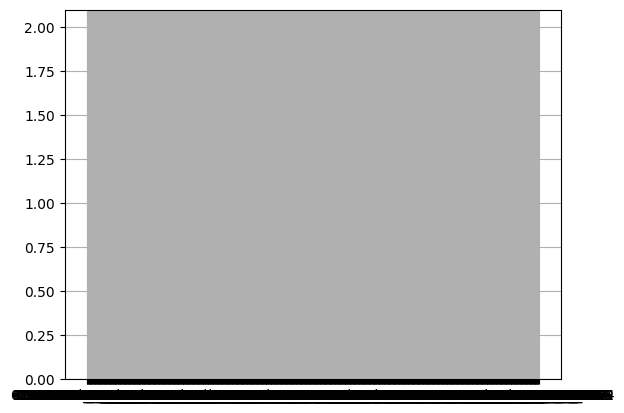

In [21]:
pd.Series(model.wv.most_similar(f"{id_sample_player}___", topn=500)).hist(bins=100)

In [30]:
display_similarities("Mario Balotelli")

Theo Walcott 20467 (Arsenal): 0.9998660683631897 - F
Franco Di Santo 49724 (Wigan Athletic): 0.99979168176651 - F
Olivier Giroud 44346 (Arsenal): 0.9997612833976746 - F
Adam Le Fondre 19163 (Reading): 0.9994592070579529 - F
Wayne Rooney 13017 (Everton): 0.9994075894355774 - F
Romelu Lukaku 66749 (West Bromwich Albion): 0.9993678331375122 - F
Jonathan Walters 12813 (Reading): 0.9987212419509888 - F
Marc-Antoine Fortuné 14279 (West Bromwich Albion): 0.9987058639526367 - F
Itay Shechter 74363 (Aston Villa): 0.998540997505188 - F
Grant Holt 5741 (Fulham): 0.9983429312705994 - F


In [31]:
display_similarities("Olivier Giroud")

Carlos Tevez 20312 (Manchester City): 0.9999933838844299 - F
Wayne Rooney 13017 (Everton): 0.9998325109481812 - F
Serge Gnabry 133798 (Norwich City): 0.9997081160545349 - F
Andreas Weimann 80979 (West Ham United): 0.9994829297065735 - F
Rickie Lambert 11037 (Manchester City): 0.9994676113128662 - F
Brett Holman 13866 (West Ham United): 0.9994207620620728 - F
Mladen Petric 11987 (Fulham): 0.9993894100189209 - F
Christian Benteke 54861 (Aston Villa): 0.9993826746940613 - F
Jay Rodriguez 44683 (Manchester City): 0.9993305206298828 - F
Nathan Delfouneso 51484 (Aston Villa): 0.99932861328125 - F


In [32]:
display_similarities("Robin van Persie")

Chicharito 43020 (Southampton): 0.9999899864196777 - F
Adam Le Fondre 19163 (Reading): 0.9995360374450684 - F
Kevin Mirallas 26901 (Aston Villa): 0.9994153380393982 - F
Ricardo Vaz Tê 17353 (West Ham United): 0.9991476535797119 - F
Danny Graham 15398 (Queens Park Rangers): 0.9991101026535034 - F
Romelu Lukaku 66749 (West Bromwich Albion): 0.9990785717964172 - F
Peter Odemwingie 26900 (West Bromwich Albion): 0.9988226890563965 - F
Dimitar Berbatov 8595 (West Ham United): 0.9986029863357544 - F
Luis Suárez 39336 (West Bromwich Albion): 0.998600423336029 - F
Demba Ba 47412 (Newcastle United): 0.9985439777374268 - F


In [33]:
display_similarities("Jermain Defoe")

Clint Dempsey 20226 (Reading): 0.9999907612800598 - F
Loïc Rémy 38419 (West Ham United): 0.9995608329772949 - F
Wayne Rooney 13017 (Everton): 0.9994261264801025 - F
Romelu Lukaku 66749 (West Bromwich Albion): 0.9993600845336914 - F
Noel Hunt 15729 (Reading): 0.998382568359375 - F
Iago Falque 51960 (Everton): 0.9983782768249512 - F
Junior Hoilett 49806 (Queens Park Rangers): 0.9982851147651672 - F
Simeon Jackson 19321 (Norwich City): 0.9979654550552368 - F


In [34]:
display_similarities("Frank Lampard")

Ramires 53392 (Chelsea): 0.999988853931427 - M
Oriol Romeu 78056 (Chelsea): 0.9999718070030212 - M
Ryan Giggs 3 (Manchester United): 0.9999621510505676 - M
Marko Marin 41450 (Chelsea): 0.9999082684516907 - M
James Milner 15157 (Liverpool): 0.9998576641082764 - M
Joe Allen 40555 (West Bromwich Albion): 0.9998360276222229 - M
Vurnon Anita 40799 (Newcastle United): 0.9997235536575317 - M
Lucas Piazón 111565 (Chelsea): 0.9995181560516357 - M
Jonathan de Guzmán 39204 (Queens Park Rangers): 0.9994592666625977 - M
Alfred N'Diaye 49688 (Sunderland): 0.9994036555290222 - M


In [35]:
display_similarities("Luis Suárez")

Raheem Sterling 103955 (Liverpool): 0.9999904632568359 - F
Carlton Cole 12799 (West Ham United): 0.9999858736991882 - F
Modibo Maiga 42954 (West Ham United): 0.9999784231185913 - F
Marouane Chamakh 15675 (Sunderland): 0.9999565482139587 - F
Jordon Ibe 103912 (Liverpool): 0.9998580813407898 - F
Ricardo Vaz Tê 17353 (West Ham United): 0.9998044967651367 - F
Jonathan Walters 12813 (Reading): 0.9997633099555969 - F
Rickie Lambert 11037 (Manchester City): 0.9997174739837646 - F
Noel Hunt 15729 (Reading): 0.9995535612106323 - F
Arouna Koné 26921 (Wigan Athletic): 0.9993358254432678 - F


In [36]:
display_similarities("Luis Suárez", same_position=False)

Mohamed Diamé 28147 (West Ham United): 0.9999987483024597 - M
Jonjo Shelvey 50232 (Liverpool): 0.9999974966049194 - M
James Tomkins 49413 (West Ham United): 0.999997079372406 - D
Nuri Sahin 20368 (Liverpool): 0.9999966621398926 - M
Jack Collison 49414 (West Ham United): 0.9999952912330627 - M
Andre Wisdom 89088 (Norwich City): 0.9999925494194031 - D
Raheem Sterling 103955 (Liverpool): 0.9999904632568359 - F
Suso 103953 (Liverpool): 0.9999902248382568 - M
None 5716 (West Ham United): 0.999989926815033 - None
Dan Potts 108411 (Arsenal): 0.9999895095825195 - D


In [37]:
display_similarities("Vincent Kompany")

Maicon 18573 (Stoke City): 0.9999940991401672 - D
Matija Nastasic 84702 (Fulham): 0.9999915957450867 - D
Kolo Touré 12450 (Liverpool): 0.9999908208847046 - D
Ryan Bertrand 40146 (Wigan Athletic): 0.9999061822891235 - D
Brede Hangeland 15284 (Fulham): 0.9997869729995728 - D
Sascha Riether 17160 (Fulham): 0.9997487664222717 - D
Leighton Baines 12745 (Everton): 0.9996994733810425 - D
Ryan Shotton 45158 (Stoke City): 0.9993899464607239 - D
Alan Tate 11883 (Swansea City): 0.9993628263473511 - D
Phil Bardsley 17997 (Sunderland): 0.9992174506187439 - D


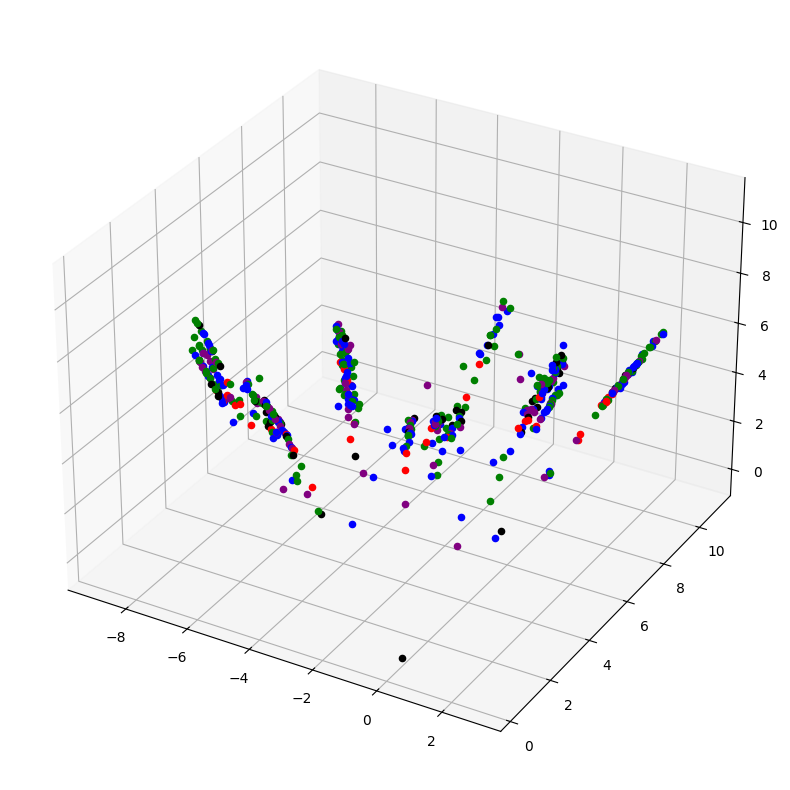

In [38]:
# 3D Plot of the embeddings
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(111, projection="3d")


colors = {
    "G": "red",
    "D": "blue",
    "M": "green",
    "F": "purple",
}


def color_from_position(position):
    return colors.get(position, "black")


for player_id in model.wv.index_to_key:
    # print(player_id[:-3])
    if player_id[-3:] == "___":
        player_name = epl_player_data.get_player_name(int(player_id[:-3]))
        team = get_team_name(int(player_id[:-3]))
        position = epl_player_data.get_player_position(int(player_id[:-3]))
        x, y, z = model.wv[player_id]
        # ax.scatter(x, y, z) #, label=f"{player_name} ({team}) - {position}")

        # Color by position
        ax.scatter(x, y, z, color=color_from_position(position)) #, label=f"{player_name} ({team}) - {position}")

In [40]:
embeddings_arr = np.zeros((len(model.wv.index_to_key), dimensions))
for i, player_id in enumerate(model.wv.index_to_key):
    embeddings_arr[i] = model.wv[player_id]

embeddings_arr.shape

(37521, 3)

#### Kmeans

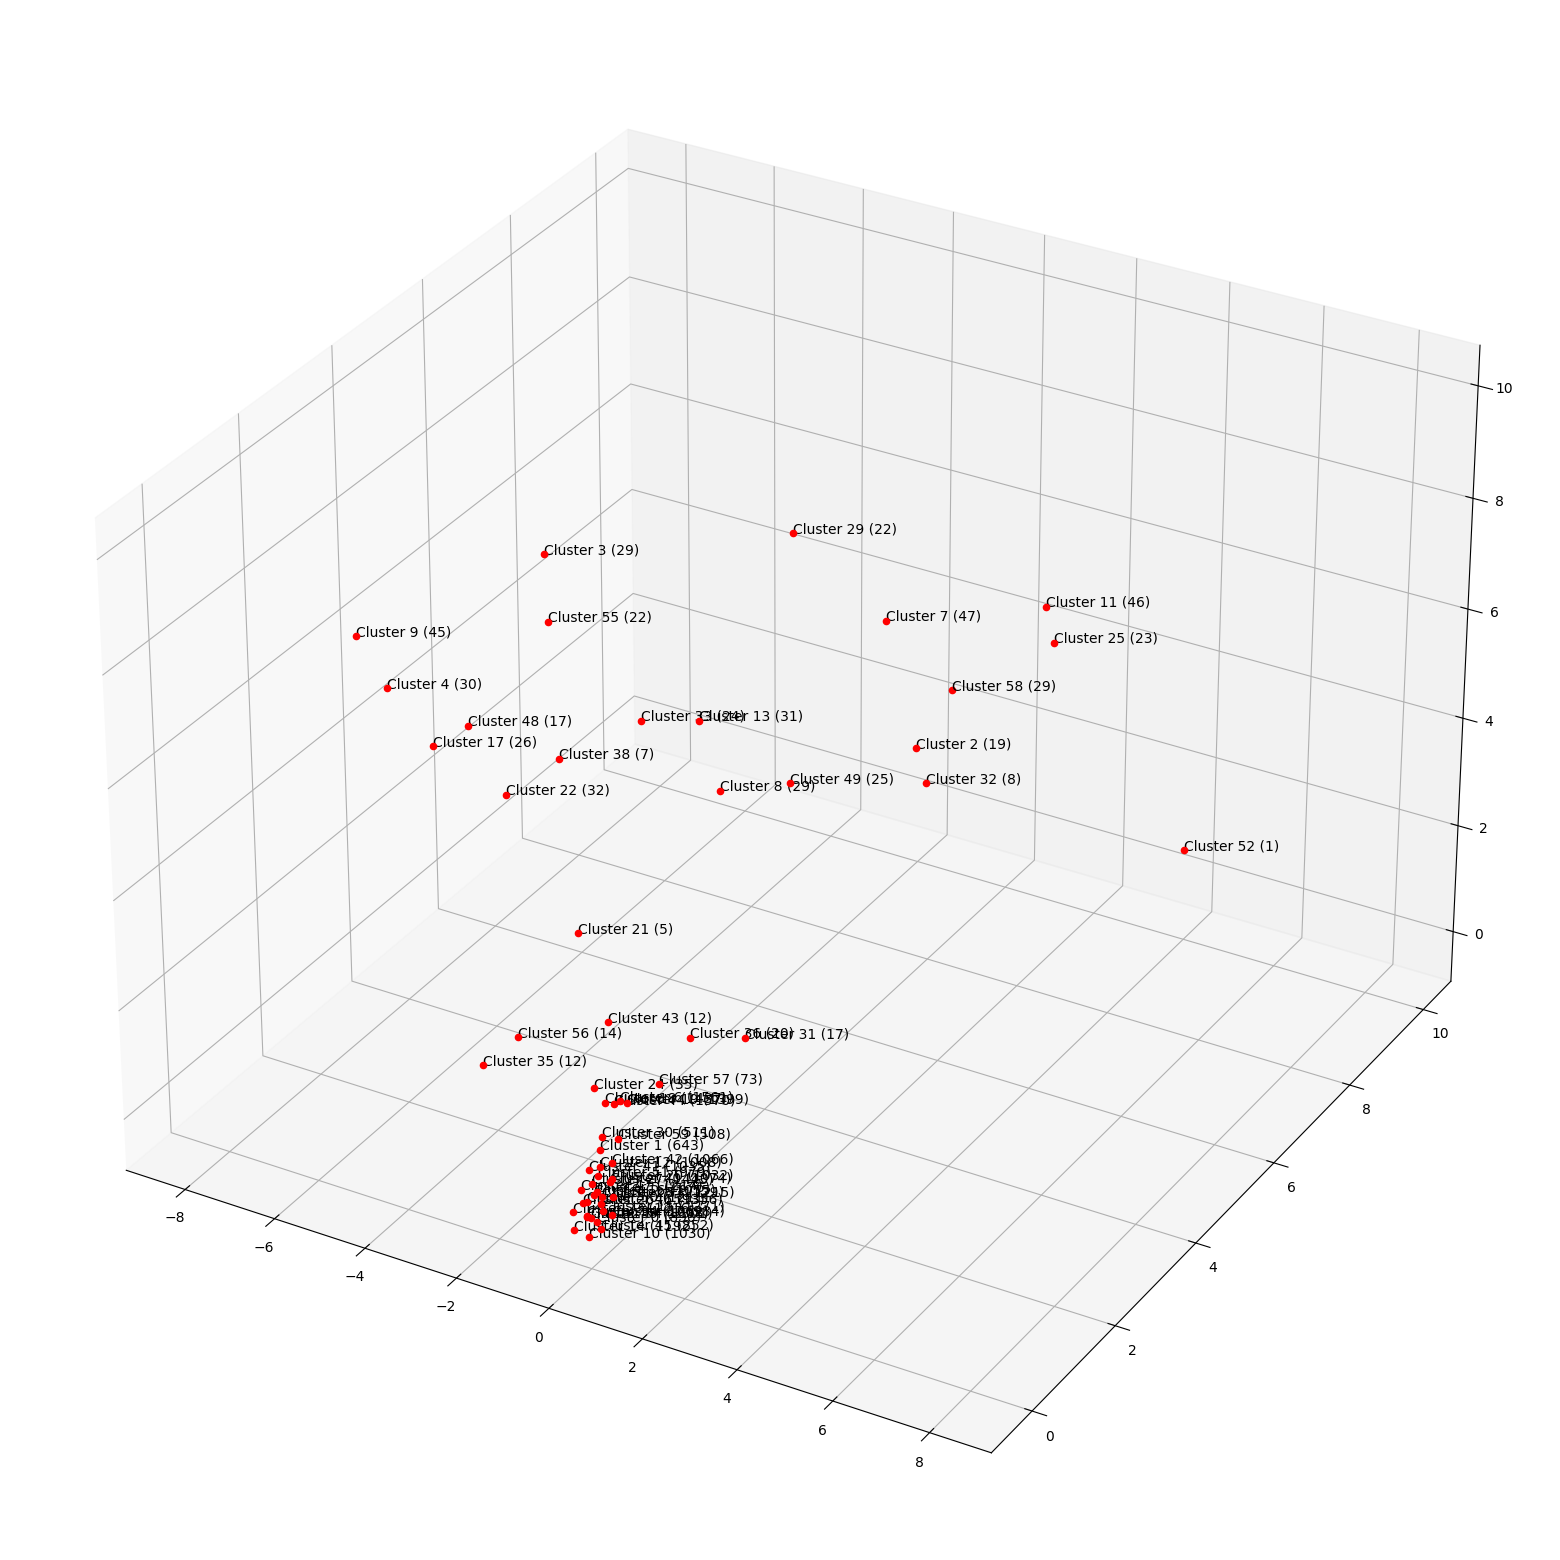

In [41]:
# Clustering

from sklearn.cluster import KMeans

n_clusters = 60

kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model
kmeans.fit(embeddings_arr.reshape(-1, dimensions))

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

# Get the cluster labels
cluster_labels = kmeans.labels_

# Plot the cluster centers

fig = plt.figure(figsize=(20, 20))

ax = fig.add_subplot(111, projection="3d")

for i, center in enumerate(cluster_centers):
    ax.scatter(center[0], center[1], center[2], color="red")
    # count per cluster
    count = np.sum(cluster_labels == i)
    
    # Add a label
    ax.text(center[0], center[1], center[2], f"Cluster {i} ({count})", color="black")

In [42]:
len(cluster_labels)

37521

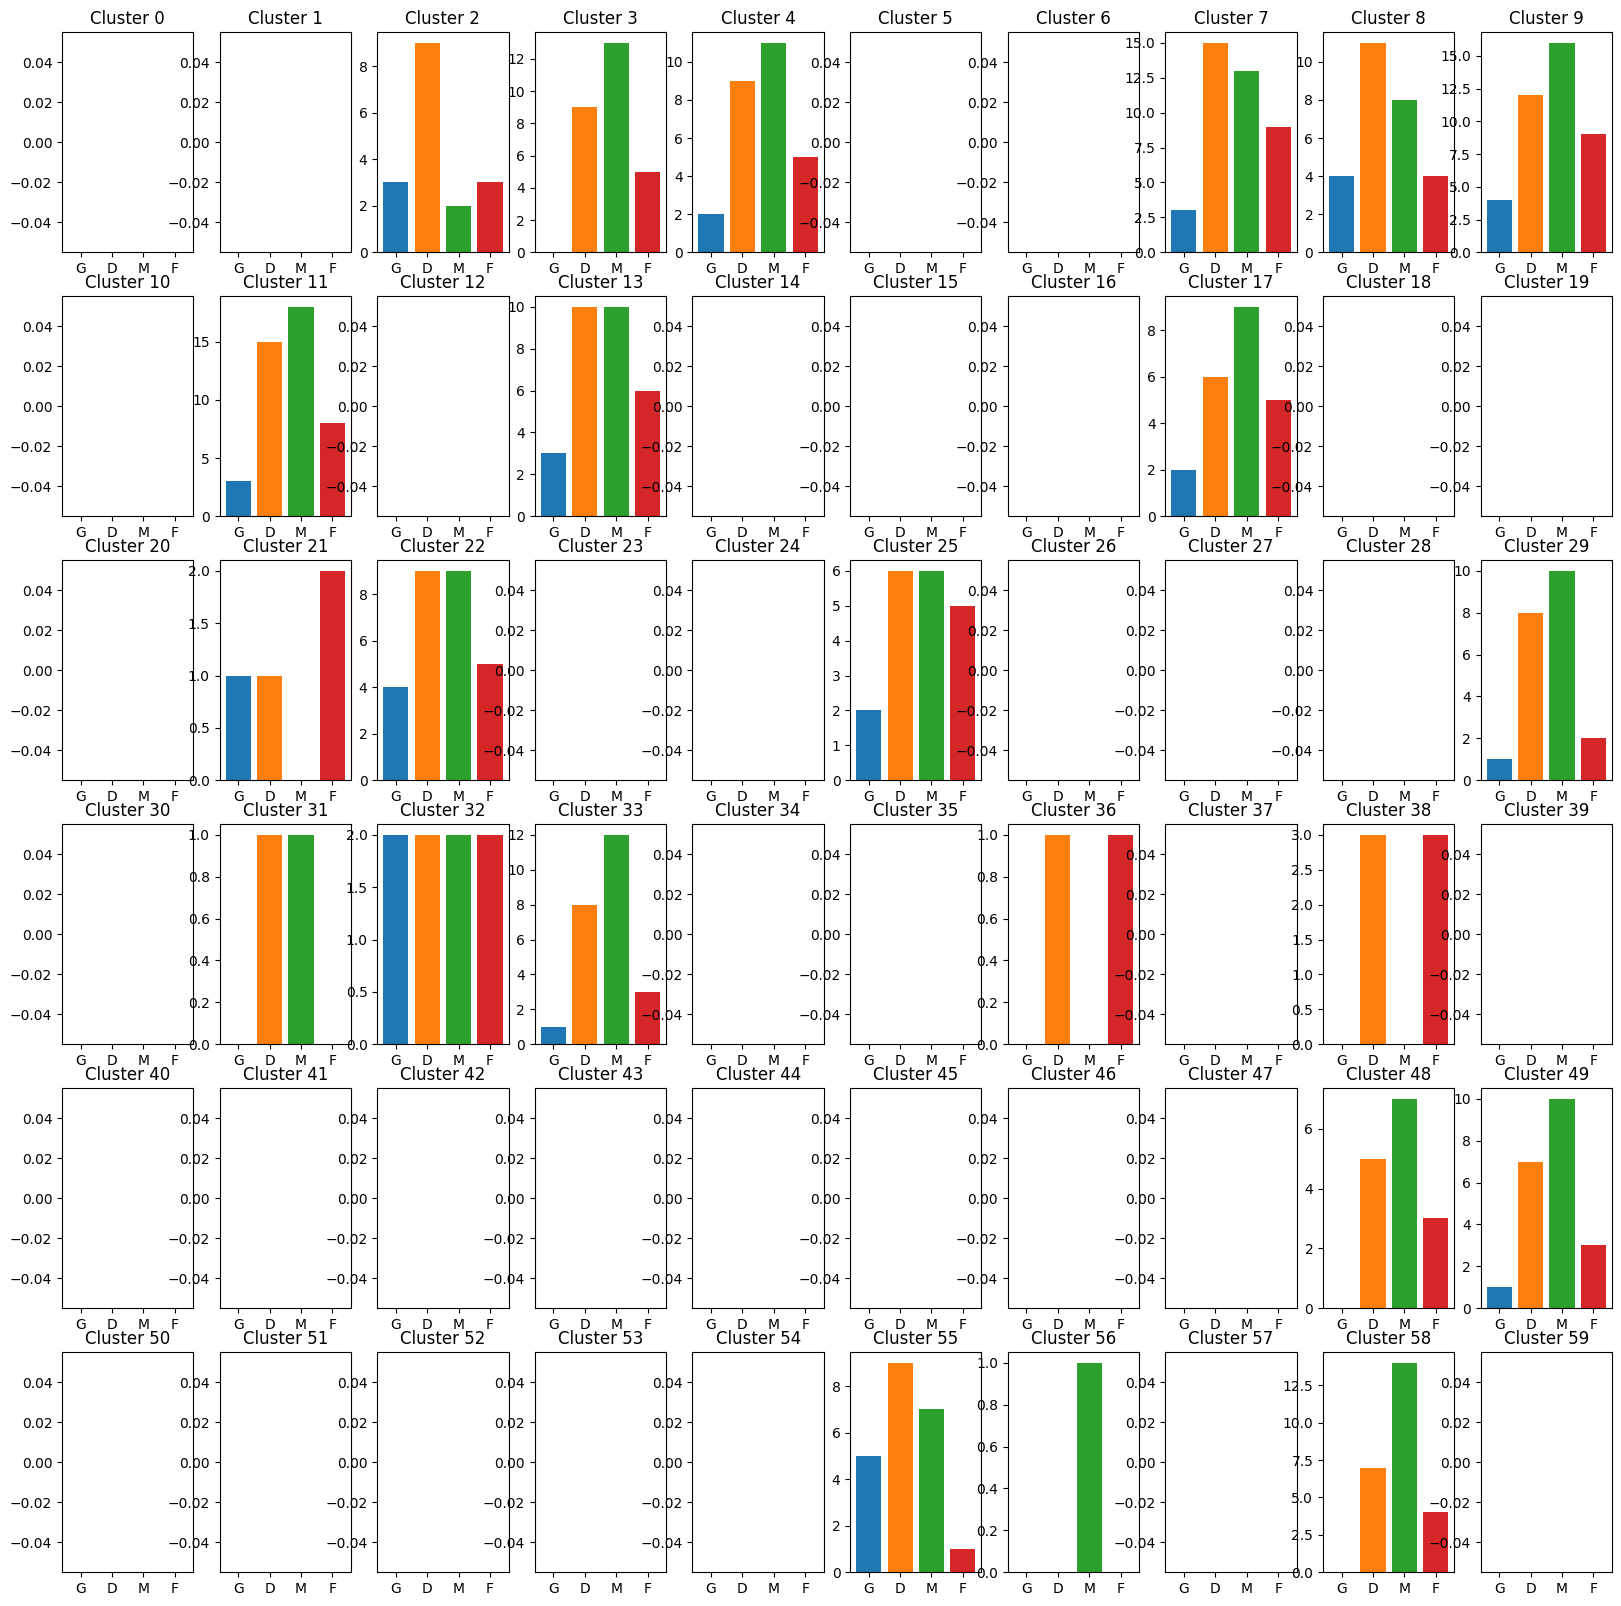

In [43]:
# Get proportion of positions for players in each cluster

cluster_positions = {
    i: {
        "G": 0,
        "D": 0,
        "M": 0,
        "F": 0,
        "U": 0,
    }
    for i in range(n_clusters)
}

for i, player in enumerate(model.wv.index_to_key):
    if player in ["Gain", "Loss", "Shot"]:
        continue
    if player[-3:] == "___":
        player_id = int(player[:-3])
        position = epl_player_data.get_player_position(player_id)
        position = position if position else "U"
        # Get label of player
        label = cluster_labels[i]
        
        cluster_positions[label][position] += 1

# Facet plot
fig, axs = plt.subplots(round(n_clusters / 10), 10, figsize=(20, 20))

positions = ["G", "D", "M", "F"]

for i in range(n_clusters):
    cluster_position = cluster_positions[i]
    cluster_position_df = pd.DataFrame(cluster_position, index=[0])
    cluster_position_df = cluster_position_df[positions]  # Excluir "U"
    
    ax = axs[i // 10, i % 10]
    for position in positions:
        ax.bar(position, cluster_position_df[position], label=position)
    ax.set_title(f"Cluster {i}")

#### KNN

In [44]:
# K Nearest Neighbors

from sklearn.neighbors import NearestNeighbors

n_neighbors = 10

# Fit the model
neigh = NearestNeighbors(n_neighbors=n_neighbors)

neigh.fit(embeddings_arr)

# Get the nearest neighbors
nearest_neighbors = neigh.kneighbors(embeddings_arr)


In [7]:
player_id_embedding = {
    player: i for i, player in enumerate(model.wv.index_to_key) 
}

player_id_embedding

{'Loss': 0,
 'Shot': 1,
 '38297___': 2,
 '39104___': 3,
 '39217___': 4,
 '17336___': 5,
 '6240___': 6,
 '46998___': 7,
 '26725___': 8,
 '49013___': 9,
 '19688___': 10,
 '39221___': 11,
 '97612___': 12,
 '42996___': 13,
 '2060___': 14,
 '54102___': 15,
 '43670___': 16,
 '60252___': 17,
 '26900___': 18,
 '20658___': 19,
 '36903___': 20,
 '43191___': 21,
 '61944___': 22,
 '13017___': 23,
 '42593___': 24,
 '19196___': 25,
 '3___': 26,
 '19197___': 27,
 '5306___': 28,
 '363___': 29,
 '40755___': 30,
 '84702___': 31,
 '56979___': 32,
 '28554___': 33,
 '13594___': 34,
 '115556___': 35,
 '76542___': 36,
 '28301___': 37,
 '28146___': 38,
 '101178___': 39,
 '7958___': 40,
 '47412___': 41,
 '18073___': 42,
 '14664___': 43,
 '1632___': 44,
 '39895___': 45,
 '15109___': 46,
 '21060___': 47,
 '14402___': 48,
 '15398___': 49,
 '39765___': 50,
 '39336___': 51,
 '49414___': 52,
 '37084___': 53,
 '41328___': 54,
 '6994___': 55,
 '19534___': 56,
 '15114___': 57,
 '1814___': 58,
 '50471___': 59,
 '40145__

### NeuralNet

In [195]:
# node2vec
dimensions = 64
node2vec = Node2Vec(
    EPL_Graph, dimensions=dimensions, walk_length=16, num_walks=200, workers=4
)

model = node2vec.fit(window=12, min_count=1, batch_words=4)

# Save embeddings for later use
# model.wv.save_word2vec_format("epl.emb")
# Save model for later use
# model.save("epl.model")

Generating walks (CPU: 4): 100%|██████████| 50/50 [00:06<00:00,  7.16it/s]


In [232]:
# USING TSNE PLOT TO VISUALIZE THE EMBEDDINGS

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)

embeddings_arr = np.zeros((len(model.wv.index_to_key), dimensions))
embeddings_2d = tsne.fit_transform(embeddings_arr)

fig, ax = plt.subplots(figsize=(10, 10))

for i, player_id in enumerate(model.wv.index_to_key):
    if player_id[-3:] == "___":
        # player_name = epl_player_data.get_player_name(int(player_id[:-3]))
        # team = get_team_name(int(player_id[:-3]))
        # position = epl_player_data.get_player_position(int(player_id[:-3]))
        x, y = embeddings_2d[i]
        ax.scatter(x, y) #, label=f"{player_name} ({team}) - {position}")

: 

In [196]:
shots_dataset = pd.read_csv("shots_dataset.csv").drop(columns=["lineup_id"])
shots_dataset

,player_id,team_id,match_id,match_num,shots_ratio
0,0.0,0,441999,0,0.000000
1,0.0,0,441999,0,0.000000
2,17733.0,0,441999,0,0.032249
3,19524.0,0,441999,0,0.016125
4,15943.0,0,441999,0,0.016125
...,...,...,...,...,...
41920,76227.0,1,442378,379,0.000000
41921,50471.0,1,442378,379,0.000000
41922,125510.0,1,442378,379,0.000000
41923,0.0,1,442378,379,0.000000


In [197]:
shots_dataset = shots_dataset[shots_dataset["player_id"] != 0]

In [198]:
player_ids = shots_dataset["player_id"].unique()

id_name = {
    player_id: epl_player_data.get_player_name(int(player_id)) for player_id in player_ids
}

id_name

{17733.0: 'Lukas Podolski',
 19524.0: 'Santi Cazorla',
 15943.0: 'Thomas Vermaelen',
 20467.0: 'Theo Walcott',
 80254.0: 'Carl Jenkinson',
 8758.0: 'Mikel Arteta',
 42427.0: 'Kieran Gibbs',
 17127.0: 'Per Mertesacker',
 43274.0: 'Gervinho',
 28566.0: None,
 59936.0: 'Wojciech Szczesny',
 44346.0: 'Olivier Giroud',
 41792.0: 'Aaron Ramsey',
 13227.0: 'Andrey Arshavin',
 34392.0: 'Stéphane Sessègnon',
 15073.0: 'Kieran Richardson',
 63370.0: 'James McClean',
 17468.0: 'Carlos Cuellar',
 19057.0: 'Sebastian Larsson',
 28468.0: 'Craig Gardner',
 28541.0: None,
 3736.0: "John O'Shea",
 66797.0: 'Simon Mignolet',
 28448.0: 'Lee Cattermole',
 58771.0: 'Jack Colback',
 4396.0: 'Louis Saha',
 37339.0: 'Ahmed El Mohamady',
 53371.0: 'David Meyler',
 62419.0: 'Nikica Jelavic',
 41184.0: 'Marouane Fellaini',
 27707.0: 'Darron Gibson',
 12745.0: 'Leighton Baines',
 7525.0: 'Steven Pienaar',
 8378.0: 'Leon Osman',
 6219.0: 'Sylvain Distin',
 15337.0: 'Tim Howard',
 1821.0: 'Phil Neville',
 9007.0: '

In [199]:
shots_dataset["player_name"] = shots_dataset["player_id"].apply(lambda x: id_name[x])
shots_dataset

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_21095/4109647878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_dataset["player_name"] = shots_dataset["player_id"].apply(lambda x: id_name[x])


,player_id,team_id,match_id,match_num,shots_ratio,player_name
2,17733.0,0,441999,0,0.032249,Lukas Podolski
3,19524.0,0,441999,0,0.016125,Santi Cazorla
4,15943.0,0,441999,0,0.016125,Thomas Vermaelen
5,20467.0,0,441999,0,0.016125,Theo Walcott
6,80254.0,0,441999,0,0.000000,Carl Jenkinson
...,...,...,...,...,...,...
41918,74235.0,1,442378,379,0.000000,Román Golobart
41919,106458.0,1,442378,379,0.000000,Eduard Campabadal
41920,76227.0,1,442378,379,0.000000,Fraser Fyvie
41921,50471.0,1,442378,379,0.000000,James McArthur


In [200]:
# New Dataset using the embeddings (avg)

# emb0 through emb63 are the 64 dimensions of the embeddings

# Add the embeddings to the dataset

# Create new columns for the embeddings

for i in range(dimensions):
    shots_dataset.loc[:, f"emb{i}"] = 0.0

# add the embeddings to the dataset

player_embeddings = {
    int(player_id): model.wv[f"{int(player_id)}___"] for player_id in player_ids
}

for player_id, player_embedding in player_embeddings.items():
    for i, emb in enumerate(player_embedding):
        shots_dataset.loc[
            (shots_dataset["player_id"].apply(int) == player_id), f"emb{i}"
        ] = emb

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_21095/930594229.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_dataset.loc[:, f"emb{i}"] = 0.0
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_21095/930594229.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_dataset.loc[:, f"emb{i}"] = 0.0
/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_21095/930594229.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [201]:
shots_dataset

,player_id,team_id,match_id,match_num,shots_ratio,player_name,emb0,emb1,emb2,emb3,...,emb54,emb55,emb56,emb57,emb58,emb59,emb60,emb61,emb62,emb63
2,17733.0,0,441999,0,0.032249,Lukas Podolski,2.193092,-1.801697,1.576246,0.679426,...,-0.349596,-0.735284,-0.018908,-1.106840,-1.101761,-0.879954,-1.595223,-1.360429,0.219174,0.183876
3,19524.0,0,441999,0,0.016125,Santi Cazorla,2.234521,-1.839994,1.636803,0.701932,...,-0.393673,-0.744654,-0.047192,-1.099718,-1.119927,-0.910244,-1.663583,-1.417812,0.210199,0.224310
4,15943.0,0,441999,0,0.016125,Thomas Vermaelen,2.211463,-1.728947,1.616400,0.653234,...,-0.411072,-0.792670,-0.041593,-1.071964,-1.117790,-0.894121,-1.681684,-1.357764,0.238293,0.137061
5,20467.0,0,441999,0,0.016125,Theo Walcott,2.251877,-1.784585,1.556791,0.703107,...,-0.357093,-0.772820,-0.036748,-1.160205,-1.082474,-0.881653,-1.636039,-1.349489,0.203883,0.172398
6,80254.0,0,441999,0,0.000000,Carl Jenkinson,2.317190,-1.824736,1.689000,0.654528,...,-0.319389,-0.756344,-0.051247,-1.118154,-1.125276,-0.893699,-1.651923,-1.354970,0.236600,0.162635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41918,74235.0,1,442378,379,0.000000,Román Golobart,1.062212,-0.929332,1.393355,1.143660,...,-0.241094,0.189619,0.333444,-0.636081,-0.553646,-1.018366,-1.454954,-0.378961,1.015167,-1.375112
41919,106458.0,1,442378,379,0.000000,Eduard Campabadal,0.813906,-0.700026,1.051732,0.922693,...,-0.188326,0.185102,0.250214,-0.559546,-0.428169,-0.769548,-1.117308,-0.260420,0.800518,-1.093606
41920,76227.0,1,442378,379,0.000000,Fraser Fyvie,1.188898,-0.959613,1.515506,1.169953,...,-0.214311,0.175645,0.260780,-0.584089,-0.688139,-1.116627,-1.570305,-0.455111,1.058092,-1.149765
41921,50471.0,1,442378,379,0.000000,James McArthur,0.913029,-0.801304,1.466488,1.205503,...,-0.040783,0.299375,0.170497,-0.406990,-0.728868,-1.184726,-1.506880,-0.333991,1.061507,-1.012436


In [202]:
# Save the dataset

# shots_dataset.to_csv(f"shots_dataset_embeddings_{dimensions}.csv", index=False)

In [203]:
# shots_dataset = pd.read_csv(f"shots_dataset_embeddings_{dimensions}.csv")

In [204]:
shots_dataset["position"] = shots_dataset["player_id"].apply(lambda x: epl_player_data.get_player_position(int(x)))

/var/folders/5j/7b3w3dw95qdcll87vxc3yn300000gn/T/ipykernel_21095/3837497530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots_dataset["position"] = shots_dataset["player_id"].apply(lambda x: epl_player_data.get_player_position(int(x)))


In [205]:
shots_dataset

,player_id,team_id,match_id,match_num,shots_ratio,player_name,emb0,emb1,emb2,emb3,...,emb55,emb56,emb57,emb58,emb59,emb60,emb61,emb62,emb63,position
2,17733.0,0,441999,0,0.032249,Lukas Podolski,2.193092,-1.801697,1.576246,0.679426,...,-0.735284,-0.018908,-1.106840,-1.101761,-0.879954,-1.595223,-1.360429,0.219174,0.183876,F
3,19524.0,0,441999,0,0.016125,Santi Cazorla,2.234521,-1.839994,1.636803,0.701932,...,-0.744654,-0.047192,-1.099718,-1.119927,-0.910244,-1.663583,-1.417812,0.210199,0.224310,M
4,15943.0,0,441999,0,0.016125,Thomas Vermaelen,2.211463,-1.728947,1.616400,0.653234,...,-0.792670,-0.041593,-1.071964,-1.117790,-0.894121,-1.681684,-1.357764,0.238293,0.137061,D
5,20467.0,0,441999,0,0.016125,Theo Walcott,2.251877,-1.784585,1.556791,0.703107,...,-0.772820,-0.036748,-1.160205,-1.082474,-0.881653,-1.636039,-1.349489,0.203883,0.172398,F
6,80254.0,0,441999,0,0.000000,Carl Jenkinson,2.317190,-1.824736,1.689000,0.654528,...,-0.756344,-0.051247,-1.118154,-1.125276,-0.893699,-1.651923,-1.354970,0.236600,0.162635,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41918,74235.0,1,442378,379,0.000000,Román Golobart,1.062212,-0.929332,1.393355,1.143660,...,0.189619,0.333444,-0.636081,-0.553646,-1.018366,-1.454954,-0.378961,1.015167,-1.375112,D
41919,106458.0,1,442378,379,0.000000,Eduard Campabadal,0.813906,-0.700026,1.051732,0.922693,...,0.185102,0.250214,-0.559546,-0.428169,-0.769548,-1.117308,-0.260420,0.800518,-1.093606,D
41920,76227.0,1,442378,379,0.000000,Fraser Fyvie,1.188898,-0.959613,1.515506,1.169953,...,0.175645,0.260780,-0.584089,-0.688139,-1.116627,-1.570305,-0.455111,1.058092,-1.149765,M
41921,50471.0,1,442378,379,0.000000,James McArthur,0.913029,-0.801304,1.466488,1.205503,...,0.299375,0.170497,-0.406990,-0.728868,-1.184726,-1.506880,-0.333991,1.061507,-1.012436,M


In [206]:
# shots_dataset = shots_dataset[shots_dataset["position"] == 'F']

In [207]:
# zero_indexes = shots_dataset[shots_dataset["shots_ratio"] > 0].index
# not_zero_indexes = shots_dataset[shots_dataset["shots_ratio"] == 0].index

# amm_not_zero = len(not_zero_indexes)

# # Keep a frac of amm_not_zero of zeros
# size = amm_not_zero // 5

# np.random.seed(42)
# random_not_zero_indexes = np.random.choice(not_zero_indexes, size=size, replace=False)

# shots_dataset = shots_dataset.loc[list(zero_indexes) + list(random_not_zero_indexes)]

In [208]:
# len(shots_dataset), len(not_zero_indexes), len(random_not_zero_indexes), len(zero_indexes)

In [209]:
# shots_dataset = shots_dataset.sort_index()
# shots_dataset

(0.0, 0.2)

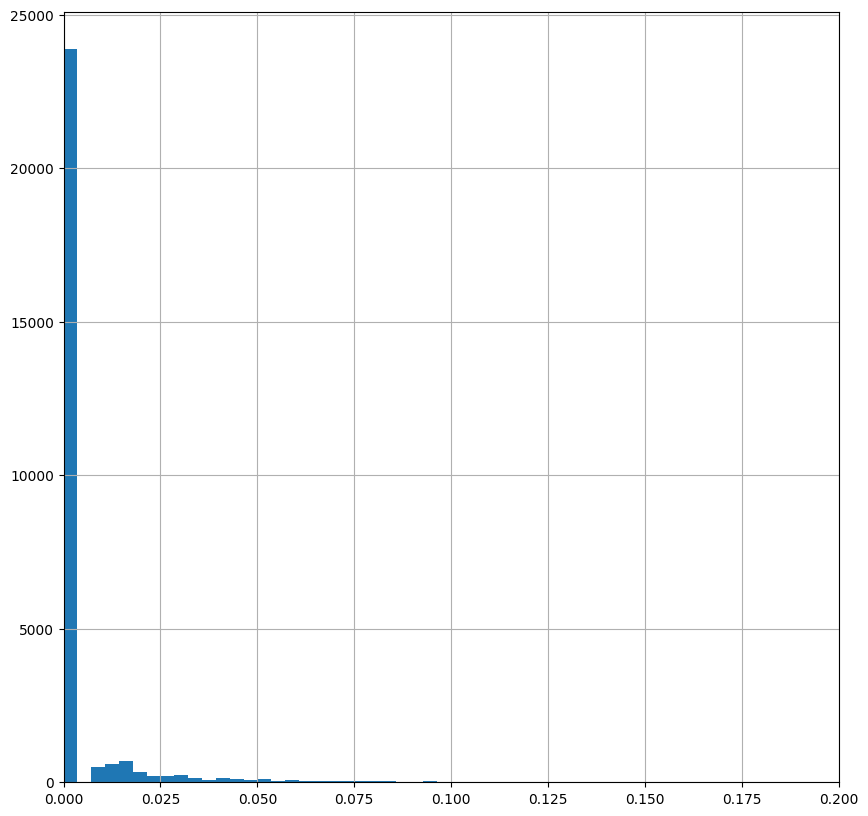

In [210]:
fig, ax = plt.subplots(figsize=(10, 10))

shots_dataset["shots_ratio"].hist(bins=300, ax=ax)

ax.set_xlim(0, 0.2)

(0.0, 0.2)

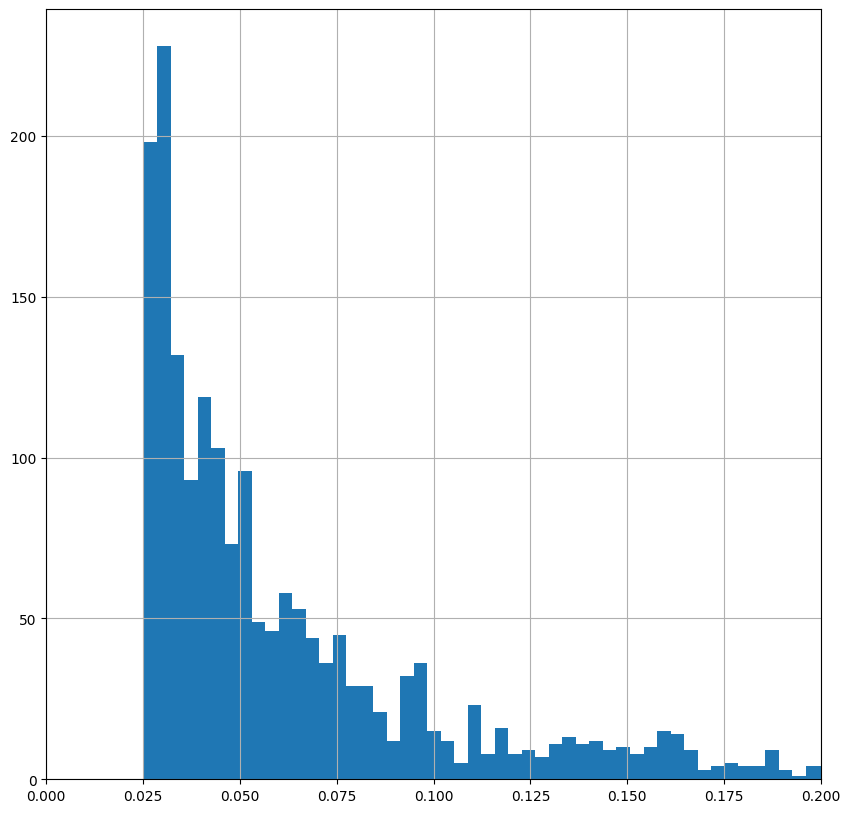

In [211]:
fig, ax = plt.subplots(figsize=(10, 10))

shots_dataset[shots_dataset["shots_ratio"] > 0.025]["shots_ratio"].hist(bins=300, ax=ax)

ax.set_xlim(0, 0.2)

In [212]:
shots_dataset = shots_dataset[shots_dataset["shots_ratio"] > 0]

In [213]:
import torch
from torch import nn
from sklearn.preprocessing import StandardScaler

In [214]:
# set seed
torch.manual_seed(42)
np.random.seed(42)
# sklearn seed
import random

random.seed(42)

#### Data

In [215]:
ds = shots_dataset

ds = pd.get_dummies(ds, columns=["position"])

train = ds[ds["match_num"] < 379 - 111]
test = ds[ds["match_num"] >= 379 - 111]

X_keys = [f"emb{i}" for i in range(dimensions)]  # + ["match_id", "player_id"]
# X_keys += ["player_id"]
X_keys += [f"position_{position}" for position in ["D", "F", "G", "M"]]

ds[X_keys]

,emb0,emb1,emb2,emb3,emb4,emb5,emb6,emb7,emb8,emb9,...,emb58,emb59,emb60,emb61,emb62,emb63,position_D,position_F,position_G,position_M
2,2.193092,-1.801697,1.576246,0.679426,1.042633,-0.272652,0.231265,-1.076216,-1.693885,-0.034322,...,-1.101761,-0.879954,-1.595223,-1.360429,0.219174,0.183876,False,True,False,False
3,2.234521,-1.839994,1.636803,0.701932,1.135771,-0.224245,0.317507,-1.146204,-1.712636,0.005037,...,-1.119927,-0.910244,-1.663583,-1.417812,0.210199,0.224310,False,False,False,True
4,2.211463,-1.728947,1.616400,0.653234,1.088702,-0.231140,0.305567,-1.080703,-1.637127,-0.035010,...,-1.117790,-0.894121,-1.681684,-1.357764,0.238293,0.137061,True,False,False,False
5,2.251877,-1.784585,1.556791,0.703107,1.074386,-0.279776,0.312461,-1.080670,-1.715728,-0.055606,...,-1.082474,-0.881653,-1.636039,-1.349489,0.203883,0.172398,False,True,False,False
9,2.280513,-1.816023,1.639717,0.693819,1.115735,-0.260966,0.310032,-1.092396,-1.690630,-0.039295,...,-1.178880,-0.885604,-1.711879,-1.410717,0.213290,0.186958,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41867,0.998859,-0.861665,1.515734,1.223978,0.528482,-0.901733,0.713000,-0.808400,-1.811825,-0.811579,...,-0.689145,-1.176860,-1.501843,-0.403070,1.107078,-0.992420,True,False,False,False
41868,1.094329,-0.907075,1.530689,1.243379,0.515706,-0.858558,0.690752,-0.790039,-1.884686,-0.949904,...,-0.698428,-1.200372,-1.606315,-0.370599,1.060009,-1.239996,False,False,False,True
41869,1.062212,-0.929332,1.393355,1.143660,0.494248,-0.864014,0.650704,-0.697657,-1.891900,-0.998851,...,-0.553646,-1.018366,-1.454954,-0.378961,1.015167,-1.375112,True,False,False,False
41871,0.913029,-0.801304,1.466488,1.205503,0.482588,-0.892015,0.697330,-0.798624,-1.762525,-0.785833,...,-0.728868,-1.184726,-1.506880,-0.333991,1.061507,-1.012436,False,False,False,True


In [216]:
class NotScaler:
    def fit_transform(self, x):
        return x * 100

    def transform(self, x):
        return x * 100

    def inverse_transform(self, x):
        return x / 100

class Log1pScaler:
    def fit_transform(self, x):
        return np.log1p(x)

    def transform(self, x):
        return np.log1p(x)

    def inverse_transform(self, x):
        return np.expm1(x)

In [217]:

train_X = train[X_keys]
train_y = train["shots_ratio"]

test_X = test[X_keys]
test_y = test["shots_ratio"]

train_X = train_X.astype(np.float32)
train_y = train_y.astype(np.float32)


scaler = Log1pScaler()
# scaler = NotScaler()

train_y = scaler.fit_transform(train_y.values.reshape(-1, 1)).flatten()
test_y = scaler.transform(test_y.values.reshape(-1, 1)).flatten()

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available() else "cpu"
)

train_X = torch.tensor(train_X.values.astype(np.float32), dtype=torch.float32).to(device)
train_y = torch.tensor(train_y, dtype=torch.float32).to(device)

test_X = torch.tensor(test_X.values.astype(np.float32), dtype=torch.float32).to(device)
test_y = torch.tensor(test_y, dtype=torch.float32).to(device)

#### Models

In [218]:
class ShotPredictor(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropouts):
        super(ShotPredictor, self).__init__()

        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size

        if len(hidden_sizes) != len(dropouts):
            raise ValueError("hidden_sizes and dropouts must have the same length")

        # print(input_size, hidden_sizes, output_size)

        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.relu = nn.ReLU()

        for i in range(1, len(hidden_sizes)):
            setattr(self, f"fc{i+1}", nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))
            setattr(self, f"dropout{i+1}", nn.Dropout(dropouts[i]))
            setattr(self, f"act_{i+1}", nn.ReLU())

        self.last_fc = nn.Linear(hidden_sizes[-1], output_size)
        self.output_act = nn.ReLU()

    def forward(self, x):
        # print(0, x.shape)
        x = self.fc1(x)
        x = self.relu(x)
        # print(0, x.shape)

        for i in range(1, len(self.hidden_sizes)):
            # print(i, x.shape)
            x = getattr(self, f"fc{i+1}")(x)
            x = getattr(self, f"dropout{i+1}")(x)
            x = getattr(self, f"act_{i+1}")(x)
            # print(i, x.shape)

        x = self.last_fc(x)
        x = self.output_act(x)
        return x

In [219]:
class ComplexShotPredictor(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropouts):
        super(ComplexShotPredictor, self).__init__()

        if len(hidden_sizes) != len(dropouts):
            raise ValueError("hidden_sizes and dropouts must have the same length")

        self.input_size = input_size
        self.hidden_sizes = hidden_sizes
        self.output_size = output_size

        # Input layer
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.norm1 = nn.LayerNorm(hidden_sizes[0])
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)

        # Dynamically create hidden layers
        self.hidden_layers = nn.ModuleList()
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.append(
                nn.Sequential(
                    nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]),
                    nn.LayerNorm(hidden_sizes[i]),
                    nn.LeakyReLU(negative_slope=0.01),
                    nn.Dropout(dropouts[i]),
                )
            )

        # Residual connections: connect the first hidden layer output with last one
        self.skip_connection = nn.Linear(hidden_sizes[0], hidden_sizes[-1])

        # Output layer with Softplus to ensure positive outputs
        self.last_fc = nn.Linear(hidden_sizes[-1], output_size)
        self.output_act = nn.Softplus()

    def forward(self, x):
        # Input layer forward pass
        x = self.fc1(x)
        x = self.norm1(x)
        x = self.leaky_relu(x)

        residual = x  # Storing the output of the first layer for residual connection

        # Hidden layers forward pass
        for layer in self.hidden_layers:
            x = layer(x)

        # Add residual connection
        x = x + self.skip_connection(residual)

        # Output layer forward pass
        x = self.last_fc(x)
        x = self.output_act(x)
        return x

In [220]:
!pip install torchmetrics

In [221]:
from torchmetrics.regression import MeanSquaredLogError

In [222]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

(torch.Size([2963, 68]),
 torch.Size([2963]),
 torch.Size([1236, 68]),
 torch.Size([1236]))

#### Train

100%|██████████| 50/50 [00:00<00:00, 68.23it/s, Loss=0.0261]

Training Loss 0.024003224447369576


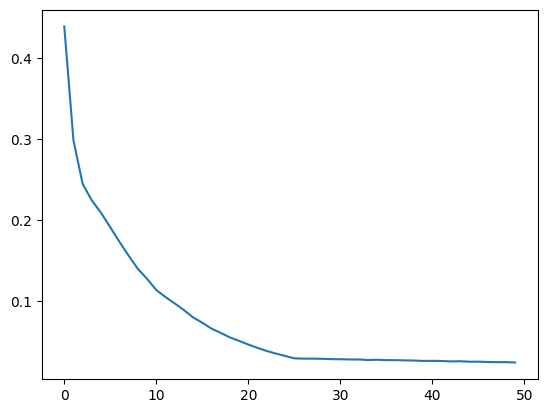

In [223]:
epochs = 50
# hidden_sizes = [128 for _ in range(3)]
# hidden_sizes = [128, 512, 512, 128]
# hidden_sizes = [64, 32, 8, 4]
hidden_sizes = [3, 3]
dropouts = [0.5 for _ in range(len(hidden_sizes))]

# model = ShotPredictor(len(X_keys), hidden_sizes, 1, dropouts).to(device)
nn_model = ComplexShotPredictor(len(X_keys), hidden_sizes, 1, dropouts).to(device)

# criterion = nn.MSELoss()
# Mean Squared Logarithmic Error (MSLE)

# criterion = MeanSquaredLogError().to(device)
# HuberLoss
criterion = nn.HuberLoss().to(device)

optimizer = torch.optim.Adam(nn_model.parameters(), lr=0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# Adagrad
# optimizer = torch.optim.Adagrad(model.parameters(), lr=0.001)

# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
#     optimizer, mode='min', factor=0.1, patience=10, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08, verbose=False
# )

# StepLR
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=25, gamma=0.1)

def train_model(model, criterion, optimizer, scheduler, X, y, epochs=epochs, losses=[]):

    iterator = tqdm(range(epochs), total=epochs)

    for epoch in iterator:
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, y.view(-1, 1))
        loss.backward()
        optimizer.step()
        if epoch % 10 == 0:
            # print(f"Epoch {epoch} - Loss: {loss.item()}")
            iterator.set_postfix({"Loss": loss.item()})
        losses.append(loss.item())
        scheduler.step()

    return losses


losses = train_model(nn_model, criterion, optimizer, scheduler, train_X, train_y)

print("Training Loss", losses[-1])

# Plot the losses

plt.plot(losses)

#### Eval

In [224]:
from sklearn.linear_model import LinearRegression

[[0.00057921]]
[0.28585166]


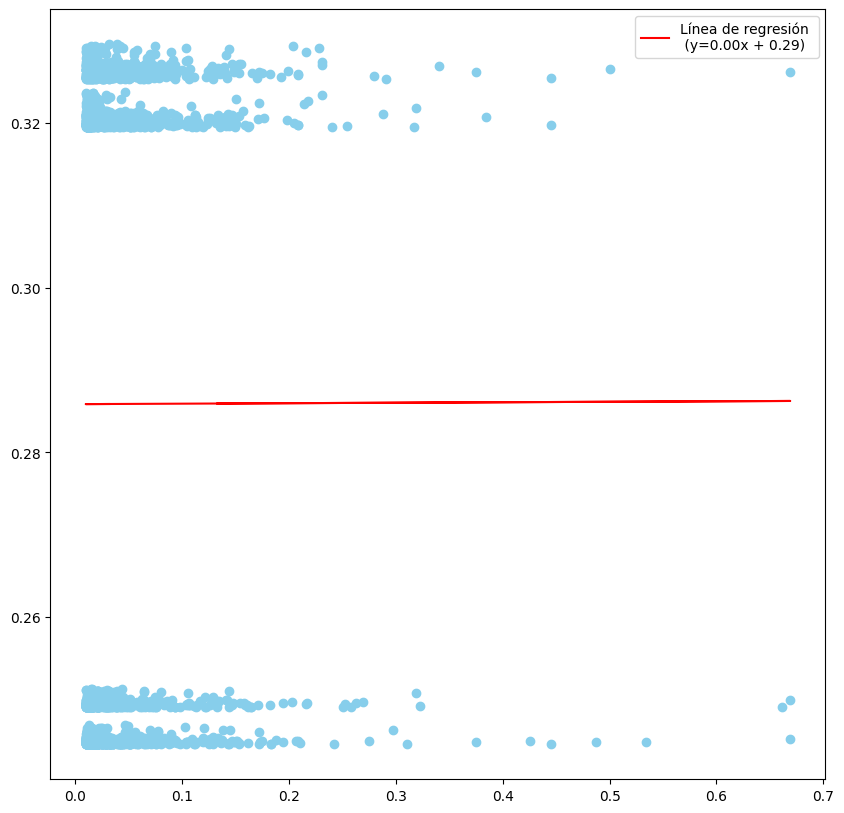

In [225]:
mse = nn.MSELoss()

with torch.no_grad():
    y_pred = nn_model(train_X)
    loss = mse(y_pred, train_y.view(-1, 1))

    y_pred = scaler.inverse_transform(y_pred.cpu().numpy().reshape(-1, 1)).flatten()

    res = pd.DataFrame(
        {
            "y_pred": y_pred,
            "y_true": scaler.inverse_transform(
                train_y.cpu().numpy().reshape(-1, 1)
            ).flatten(),
        }
    )


fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(train_y.cpu().numpy(), y_pred, color="skyblue")

# Plot regression line
reg = LinearRegression(positive=True).fit(
    np.array(train_y.cpu()).reshape(-1, 1), np.array(y_pred).reshape(-1, 1)
)
y_pred_line = reg.predict(np.array(train_y.cpu()).reshape(-1, 1))
q_slope = reg.coef_[0][0]
q_intercept = reg.intercept_[0]

print(reg.coef_)
print(reg.intercept_)

# Dibujar la línea de regresión
ax.plot(
    train_y.cpu().numpy(),
    y_pred_line,
    color="red",
    label=f"Línea de regresión \n (y={q_slope:.2f}x + {q_intercept:.2f})",
)

ax.legend()

[[0.00378268]]
[0.28255326]


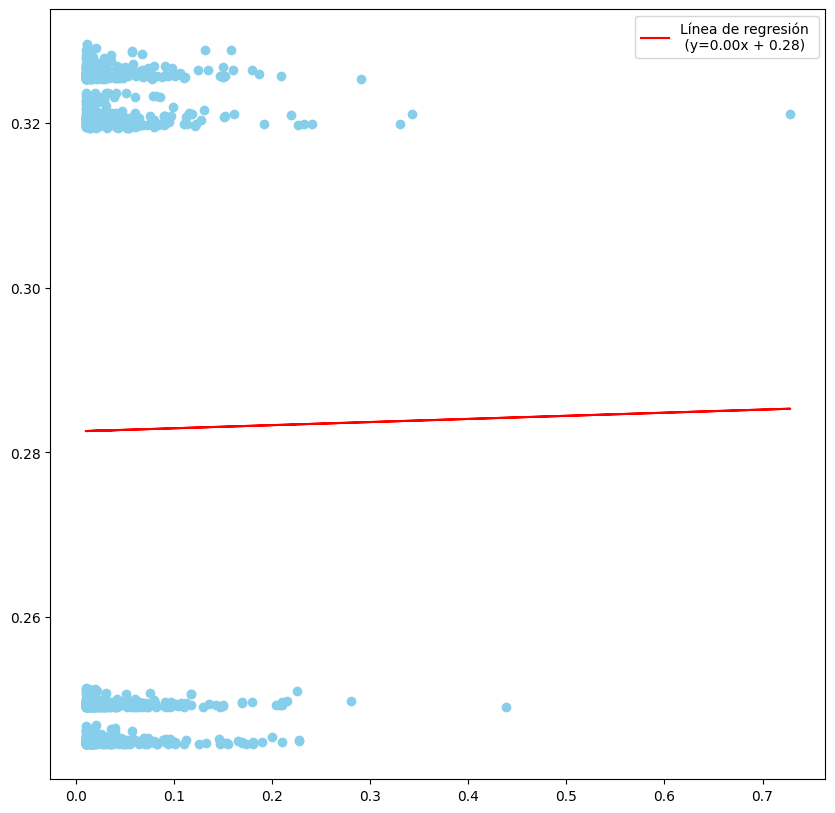

In [226]:
mse = nn.MSELoss()

with torch.no_grad():
    y_pred = nn_model(test_X)
    loss = mse(y_pred, test_y.view(-1, 1))

    y_pred = scaler.inverse_transform(y_pred.cpu().numpy().reshape(-1, 1)).flatten()

    res = pd.DataFrame({"y_pred": y_pred, "y_true": scaler.inverse_transform(test_y.cpu().numpy().reshape(-1, 1)).flatten()})


fig, ax = plt.subplots(figsize=(10, 10))

ax.scatter(test_y.cpu().numpy(), y_pred, color="skyblue")

# Plot regression line
reg = LinearRegression(positive=True).fit(np.array(test_y.cpu()).reshape(-1, 1), np.array(y_pred).reshape(-1, 1))
y_pred_line = reg.predict(np.array(test_y.cpu()).reshape(-1, 1))
q_slope = reg.coef_[0][0]
q_intercept = reg.intercept_[0]

print(reg.coef_)
print(reg.intercept_)

# Dibujar la línea de regresión
ax.plot(
    test_y.cpu().numpy(),
    y_pred_line,
    color="red",
    label=f"Línea de regresión \n (y={q_slope:.2f}x + {q_intercept:.2f})",
)

ax.legend()

In [227]:
res

,y_pred,y_true
0,0.244799,0.013510
1,0.319698,0.013510
2,0.325605,0.013510
3,0.325665,0.027021
4,0.245424,0.031234
...,...,...
1231,0.320013,0.014918
1232,0.244735,0.014918
1233,0.244797,0.014918
1234,0.326723,0.029836


(0.0, 0.02)

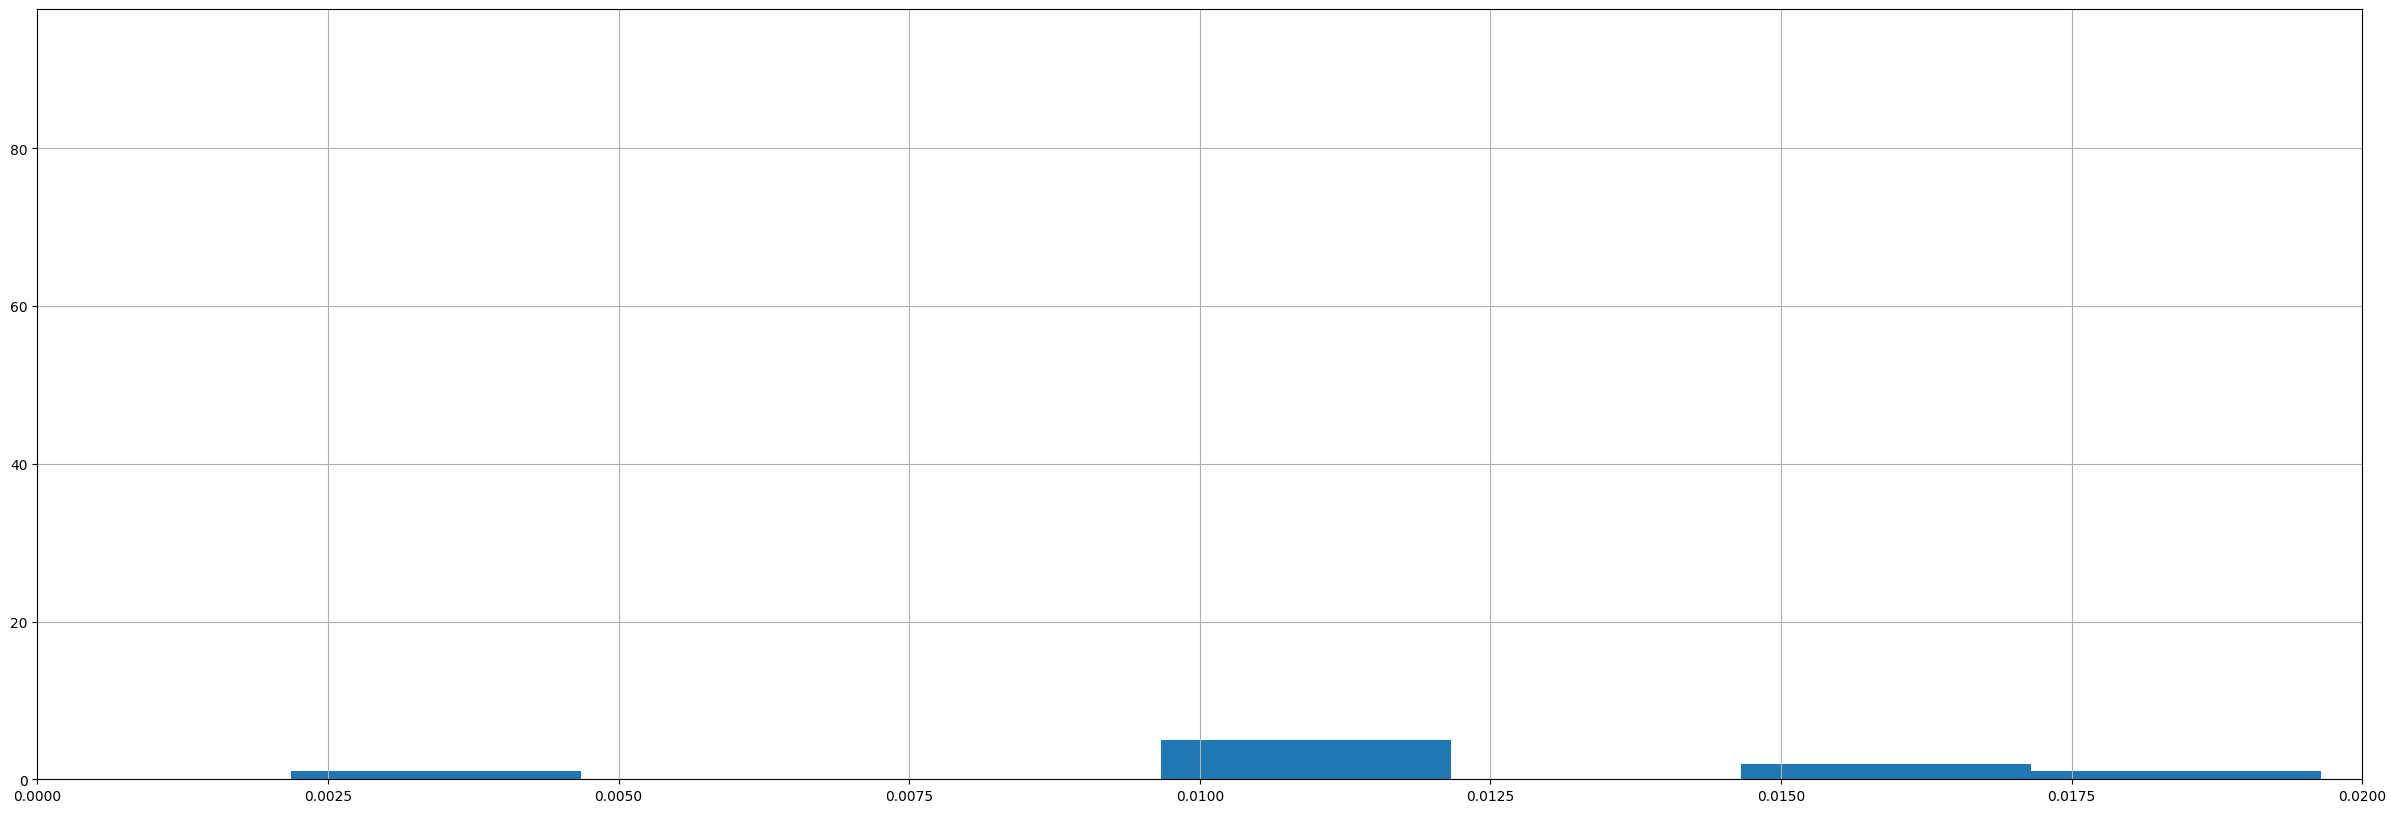

In [228]:
fig, ax = plt.subplots(figsize=(30, 10))
(res["y_true"] - res["y_pred"]).abs().hist(bins=300, ax=ax)
ax.set_xlim(0, 0.02)

<Axes: >

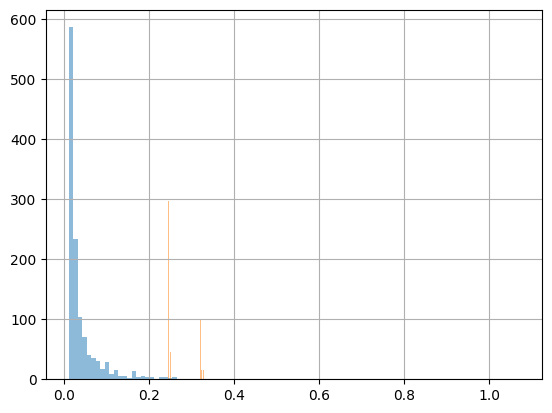

In [229]:
res["y_true"].hist(bins=100, alpha=0.5)
res["y_pred"].hist(bins=100, alpha=0.5)

In [230]:
# Stats of y_true

res["y_true"].describe()

count    1236.000000
mean        0.039767
std         0.056344
min         0.010081
25%         0.013889
50%         0.021209
75%         0.042448
max         1.071429
Name: y_true, dtype: float64

In [231]:

print("mean", res["y_true"].mean())
print("std", res["y_true"].std())
print("var", res["y_true"].var())

# skewness
print("skewness", res["y_true"].skew())
# kurtosis
print("kurtosis", res["y_true"].kurt())

mean 0.039766554
std 0.056343548
var 0.0031745953
skewness 7.2890677
kurtosis 101.15782
